# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, We will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). We will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab We will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- We will begin with loading the dataset. We can use the pyfetch method if working on JupyterLite. Otherwise, We can use pandas' read_csv() function directly on their local machines or cloud environments.


In [62]:
import numpy as np

In [63]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [64]:
## performing basic examine of df
print('The columns of the dataframe are:', df.columns)
print('The data types of the dataframe columns are:', df.dtypes)
print('The statistical summary of the dataframe are:', df.describe())

The columns of the dataframe are: Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
The data types of the dataframe columns are: ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
The statistical summary of the dataframe are:          ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000  

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [65]:
## In this analysis i am going to remove all the empty rows from the dataset to ensure data completeness and originality.
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [66]:
# Removes rows that are completely empty
df.dropna(how='all', inplace=True)
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [67]:
#remove null values from the columns which we are going to workout in the following exercise. 
columns_to_check = [
    'JobSat',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'EdLevel'
]
null_counts = df[columns_to_check].isnull().sum()

print("Number of empty (NaN) rows for the specified columns:")
print(null_counts)

Number of empty (NaN) rows for the specified columns:
JobSat                    36311
YearsCodePro              13827
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
EdLevel                    4653
dtype: int64


In [68]:
df.dropna(subset=['JobSat', 'YearsCodePro', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'EdLevel'], inplace=True)

In [69]:
null_counts = df[columns_to_check].isnull().sum()

print("Number of empty (NaN) rows for the specified columns:")
print(null_counts)

Number of empty (NaN) rows for the specified columns:
JobSat                    0
YearsCodePro              0
LanguageHaveWorkedWith    0
LanguageWantToWorkWith    0
EdLevel                   0
dtype: int64


In [36]:
#perfect

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [70]:
## examining the key given columns by calculating the value counts
print("Distribution of Employment Types")
print(df['Employment'].value_counts())
print("\n")

# Calculate value counts for 'JobSat' (Job Satisfaction)
print("Distribution of Job Satisfaction Levels")
print(df['JobSat'].value_counts())
print("\n")

# Calculate value counts for 'YearsCodePro' (Professional Coding Experience)
print("Distribution of Professional Coding Experience")
print(df['YearsCodePro'].value_counts())
print("\n")

Distribution of Employment Types
Employment
Employed, full-time                                                                                                                                                                                                     20752
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 2128
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1168
Employed, part-time                                                                                                                                                                                                       505
Employed, full-time;Student, part-time                              

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


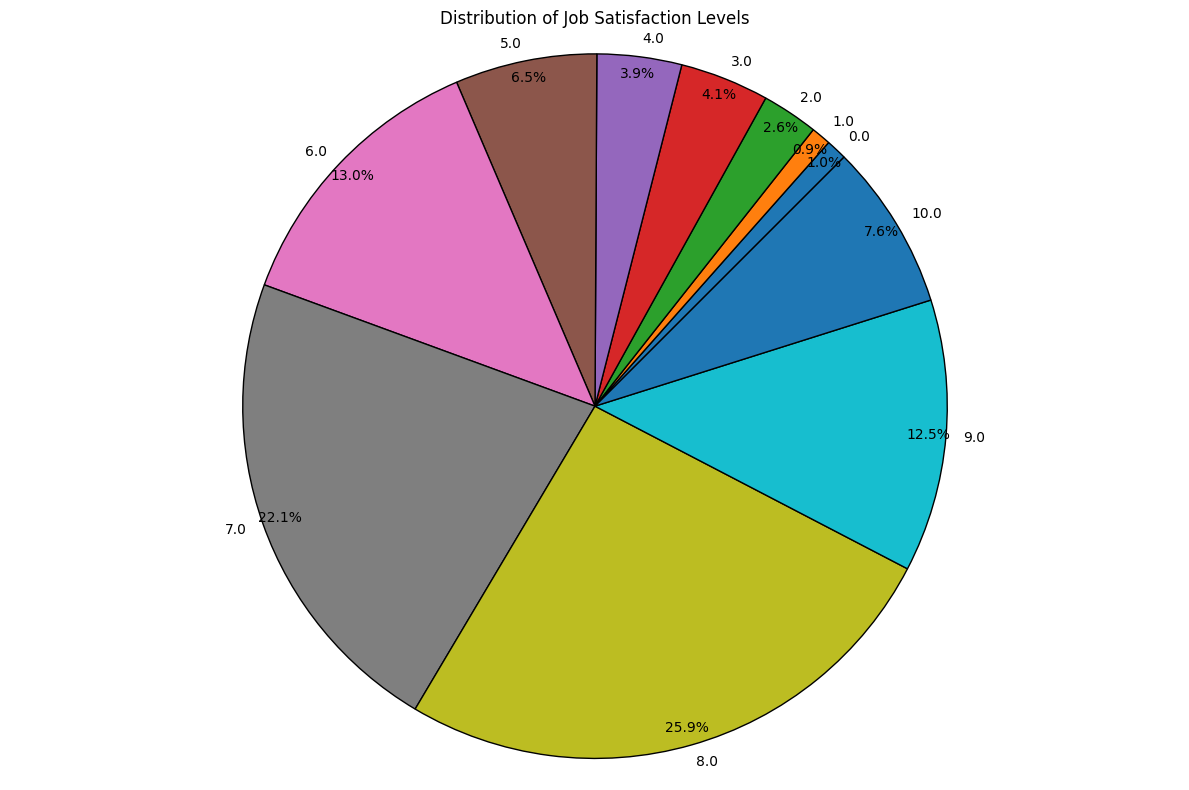

In [71]:
## creating pie plot to visualise the distribution of Job Sat
job_sat_counts = df['JobSat'].value_counts().sort_index()


plt.figure(figsize=(12, 8))
plt.pie(
    job_sat_counts,
    labels=job_sat_counts.index,
    autopct='%1.1f%%', # Format percentage on slices
    startangle=45,
    labeldistance=1.05,
    pctdistance=0.95, # Distance of percentage labels from the center
    wedgeprops={'edgecolor': 'black'} # Add a border to wedges
)
plt.yticks(rotation=45, ha='right')
plt.title('Distribution of Job Satisfaction Levels')
plt.axis('equal') # Ensures the pie chart is circular.
plt.tight_layout()
plt.show()

<h5>Interpretation of Key Trends in Job Satisfaction</h5>
The pie chart clearly indicates that the majority of respondents reported high levels of job satisfaction. The distribution is skewed towards the higher end of the scale, with very few respondents reporting low satisfaction.

<b>Most Common Satisfaction Level:</b> The most frequently reported job satisfaction level is 8.0, accounting for 25.9% of all responses. This is the largest segment of the pie chart.

<b>High Satisfaction Majority:</b> A significant majority of individuals are satisfied with their jobs. The top three satisfaction levels (7.0, 8.0, and 9.0) collectively represent 60.5% of the respondents (22.1% + 25.9% + 12.5%). If we include the 10.0 rating (7.6%), over two-thirds (68.1%) of respondents rate their satisfaction at 7.0 or higher.

<b>Low Satisfaction Minority:</b> Very few respondents reported low job satisfaction. Levels 0.0, 1.0, 2.0, and 3.0 combined only make up 7.1% of the total responses.

<b>Mid-Range Satisfaction:</b> Satisfaction levels in the middle of the scale, such as 5.0 and 6.0, were reported by 6.5% and 13.0% of respondents, respectively.
##### In summary, the distribution of JobSat in dataset appears to be skewed towards higher levels of job satisfaction, with 8.0 being the most common response, and a clear majority of respondents reporting scores of 7.0 or higher.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [56]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


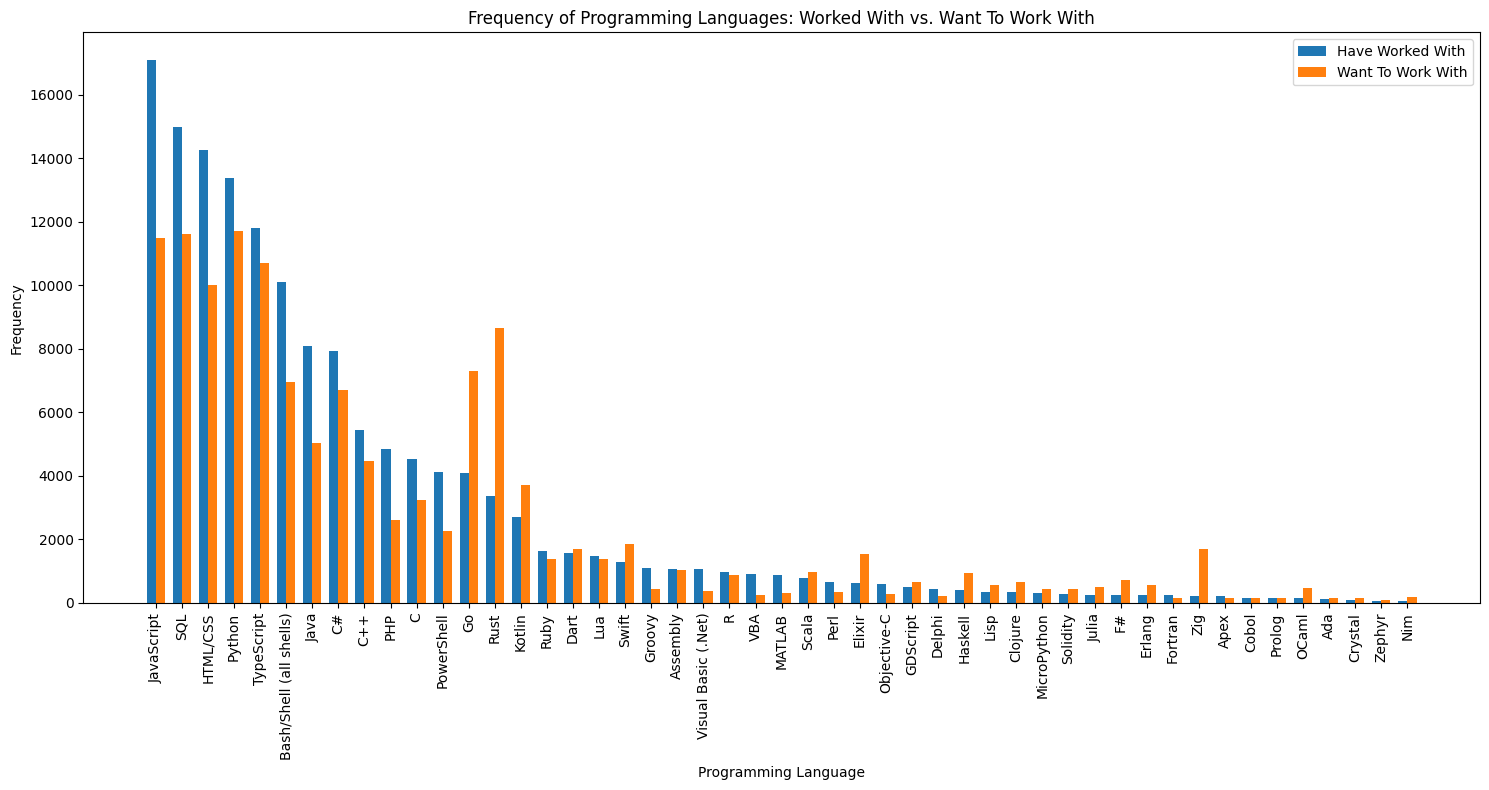

| Language                | WorkedWith   | WantToWorkWith   |
|:------------------------|:-------------|:-----------------|
| JavaScript              | 17103        | 11489            |
| SQL                     | 14987        | 11608            |
| HTML/CSS                | 14267        | 10014            |
| Python                  | 13365        | 11721            |
| TypeScript              | 11786        | 10710            |
| Bash/Shell (all shells) | 10092        | 6961             |
| Java                    | 8077         | 5050             |
| C#                      | 7941         | 6703             |
| C++                     | 5434         | 4476             |
| PHP                     | 4857         | 2601             |
| C                       | 4537         | 3231             |
| PowerShell              | 4131         | 2250             |
| Go                      | 4104         | 7297             |
| Rust                    | 3377         | 8656             |
| Kotlin

In [72]:
# Function to extract and count languages from a column
def count_languages(df, column_name):
    languages = {}
    for index, row in df.iterrows():
        if pd.notna(row[column_name]):
            for lang in row[column_name].split(';'):
                lang = lang.strip()
                languages[lang] = languages.get(lang, 0) + 1
    return languages

# Count languages for 'LanguageHaveWorkedWith'
worked_with_languages = count_languages(df, 'LanguageHaveWorkedWith')

# Count languages for 'LanguageWantToWorkWith'
want_to_work_with_languages = count_languages(df, 'LanguageWantToWorkWith')

# Convert to DataFrame for easier plotting
worked_df = pd.DataFrame(list(worked_with_languages.items()), columns=['Language', 'WorkedWith'])
want_df = pd.DataFrame(list(want_to_work_with_languages.items()), columns=['Language', 'WantToWorkWith'])

# Merge the two DataFrames
merged_df = pd.merge(worked_df, want_df, on='Language', how='outer').fillna(0)

# Sort the merged DataFrame by 'WorkedWith' in descending order
merged_df_sorted = merged_df.sort_values(by='WorkedWith', ascending=False)

# Create a grouped bar chart
plt.figure(figsize=(15, 8))
bar_width = 0.35
index = range(len(merged_df_sorted))

plt.bar(index, merged_df_sorted['WorkedWith'], bar_width, label='Have Worked With')
plt.bar([i + bar_width for i in index], merged_df_sorted['WantToWorkWith'], bar_width, label='Want To Work With')

plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.title('Frequency of Programming Languages: Worked With vs. Want To Work With')
plt.xticks([i + bar_width / 2 for i in index], merged_df_sorted['Language'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

print(merged_df_sorted.to_markdown(index=False, numalign="left", stralign="left"))

#### Here we can see that <b>Javascript</b> is the most worked programming language by the participants followed by <b>SQL</b> and <b>HTML/CSS</b>, where participants would like to work with <b>Python</b> programming language in coming future followed by <b>JavaScript</b> and <b>SQL</b>.

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


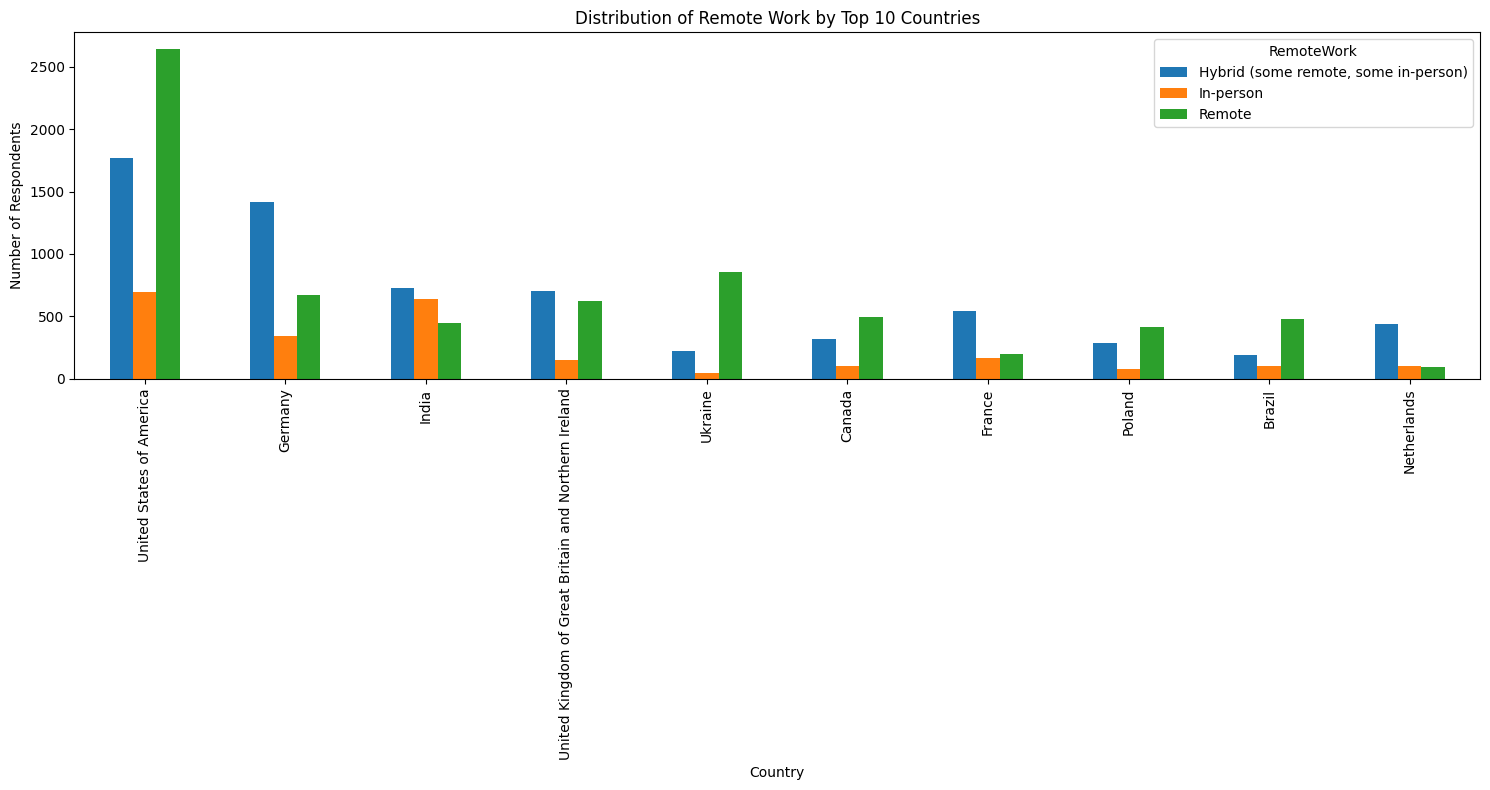

| Country                                              | Hybrid (some remote, some in-person)   | In-person   | Remote   |
|:-----------------------------------------------------|:---------------------------------------|:------------|:---------|
| United States of America                             | 1773                                   | 694         | 2645     |
| Germany                                              | 1416                                   | 341         | 668      |
| India                                                | 730                                    | 641         | 448      |
| United Kingdom of Great Britain and Northern Ireland | 701                                    | 148         | 624      |
| Ukraine                                              | 224                                    | 43          | 853      |
| Canada                                               | 320                                    | 99          | 494      |
| France        

In [73]:
remote_work_distribution = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Select top N countries for better visualization (e.g., top 15)
# Ensure to handle potential NaN values in 'Country' if they exist, before value_counts()
top_countries_series = df['Country'].value_counts().head(10)
top_countries = top_countries_series.index

# Filter the remote_work_distribution to include only top countries
# Use .reindex to ensure all top_countries are included, filling missing rows with 0
remote_work_distribution_filtered = remote_work_distribution.reindex(top_countries, fill_value=0)

# Check for any columns that might not be in the original `RemoteWork` values due to `unstack` and add them with 0 if needed.
# This ensures consistency in columns if some RemoteWork types are not present for certain countries.
# Get all unique RemoteWork values from the original DataFrame to ensure all possible columns are considered
all_remote_work_types = df['RemoteWork'].dropna().unique()
for rwt in all_remote_work_types:
    if rwt not in remote_work_distribution_filtered.columns:
        remote_work_distribution_filtered[rwt] = 0

# Plotting the grouped bar chart
remote_work_distribution_filtered.plot(kind='bar', figsize=(15, 8))
plt.title('Distribution of Remote Work by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.legend(title='RemoteWork')
plt.tight_layout()
plt.show()

print(remote_work_distribution_filtered.to_markdown(numalign="left", stralign="left"))


## Insights
##### Hybrid Work Dominance: In many top countries, hybrid work (a mix of remote and in-person) appears to be a popular model, especially in countries like the United States, the United Kingdom, and Germany.

##### Fully Remote Presence: Fully remote work is also significant, particularly in countries like the United States and Ukraine.

##### In-person Work: While less common among the top countries, some countries still show a notable presence of in-person work, such as United States, India, and Germany.

##### Variations Across Countries: The distribution varies significantly by country, reflecting different regional policies, industry norms, and preferences regarding remote work. For example, countries like Polan and Netherland in this filtered view show minimum data across three different category, which might indicate a low number of respondents from these countries.

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [74]:
## first making the data consistency for correlation
df['YearsCodePro_cleaned'] = df['YearsCodePro'].replace('Less than 1 year', 0)
df['YearsCodePro_cleaned'] = df['YearsCodePro_cleaned'].replace('More than 50 years', 51)
df['YearsCodePro_cleaned'] = pd.to_numeric(df['YearsCodePro_cleaned'], errors='coerce')
df['JobSat_cleaned'] = pd.to_numeric(df['JobSat'], errors='coerce')
correlation_df_cleaned = df[['JobSat_cleaned', 'YearsCodePro_cleaned']].dropna()

# Calculate Spearman correlation
correlation_spearman = correlation_df_cleaned['JobSat_cleaned'].corr(correlation_df_cleaned['YearsCodePro_cleaned'], method='spearman')

print(f"\nSpearman correlation between JobSat and YearsCodePro: {correlation_spearman}")



Spearman correlation between JobSat and YearsCodePro: 0.11907122116265983


#### A Spearman correlation coefficient of 0.119 between JobSat (job satisfaction) and YearsCodePro (years of professional coding experience) indicates a very weak positive correlation.

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


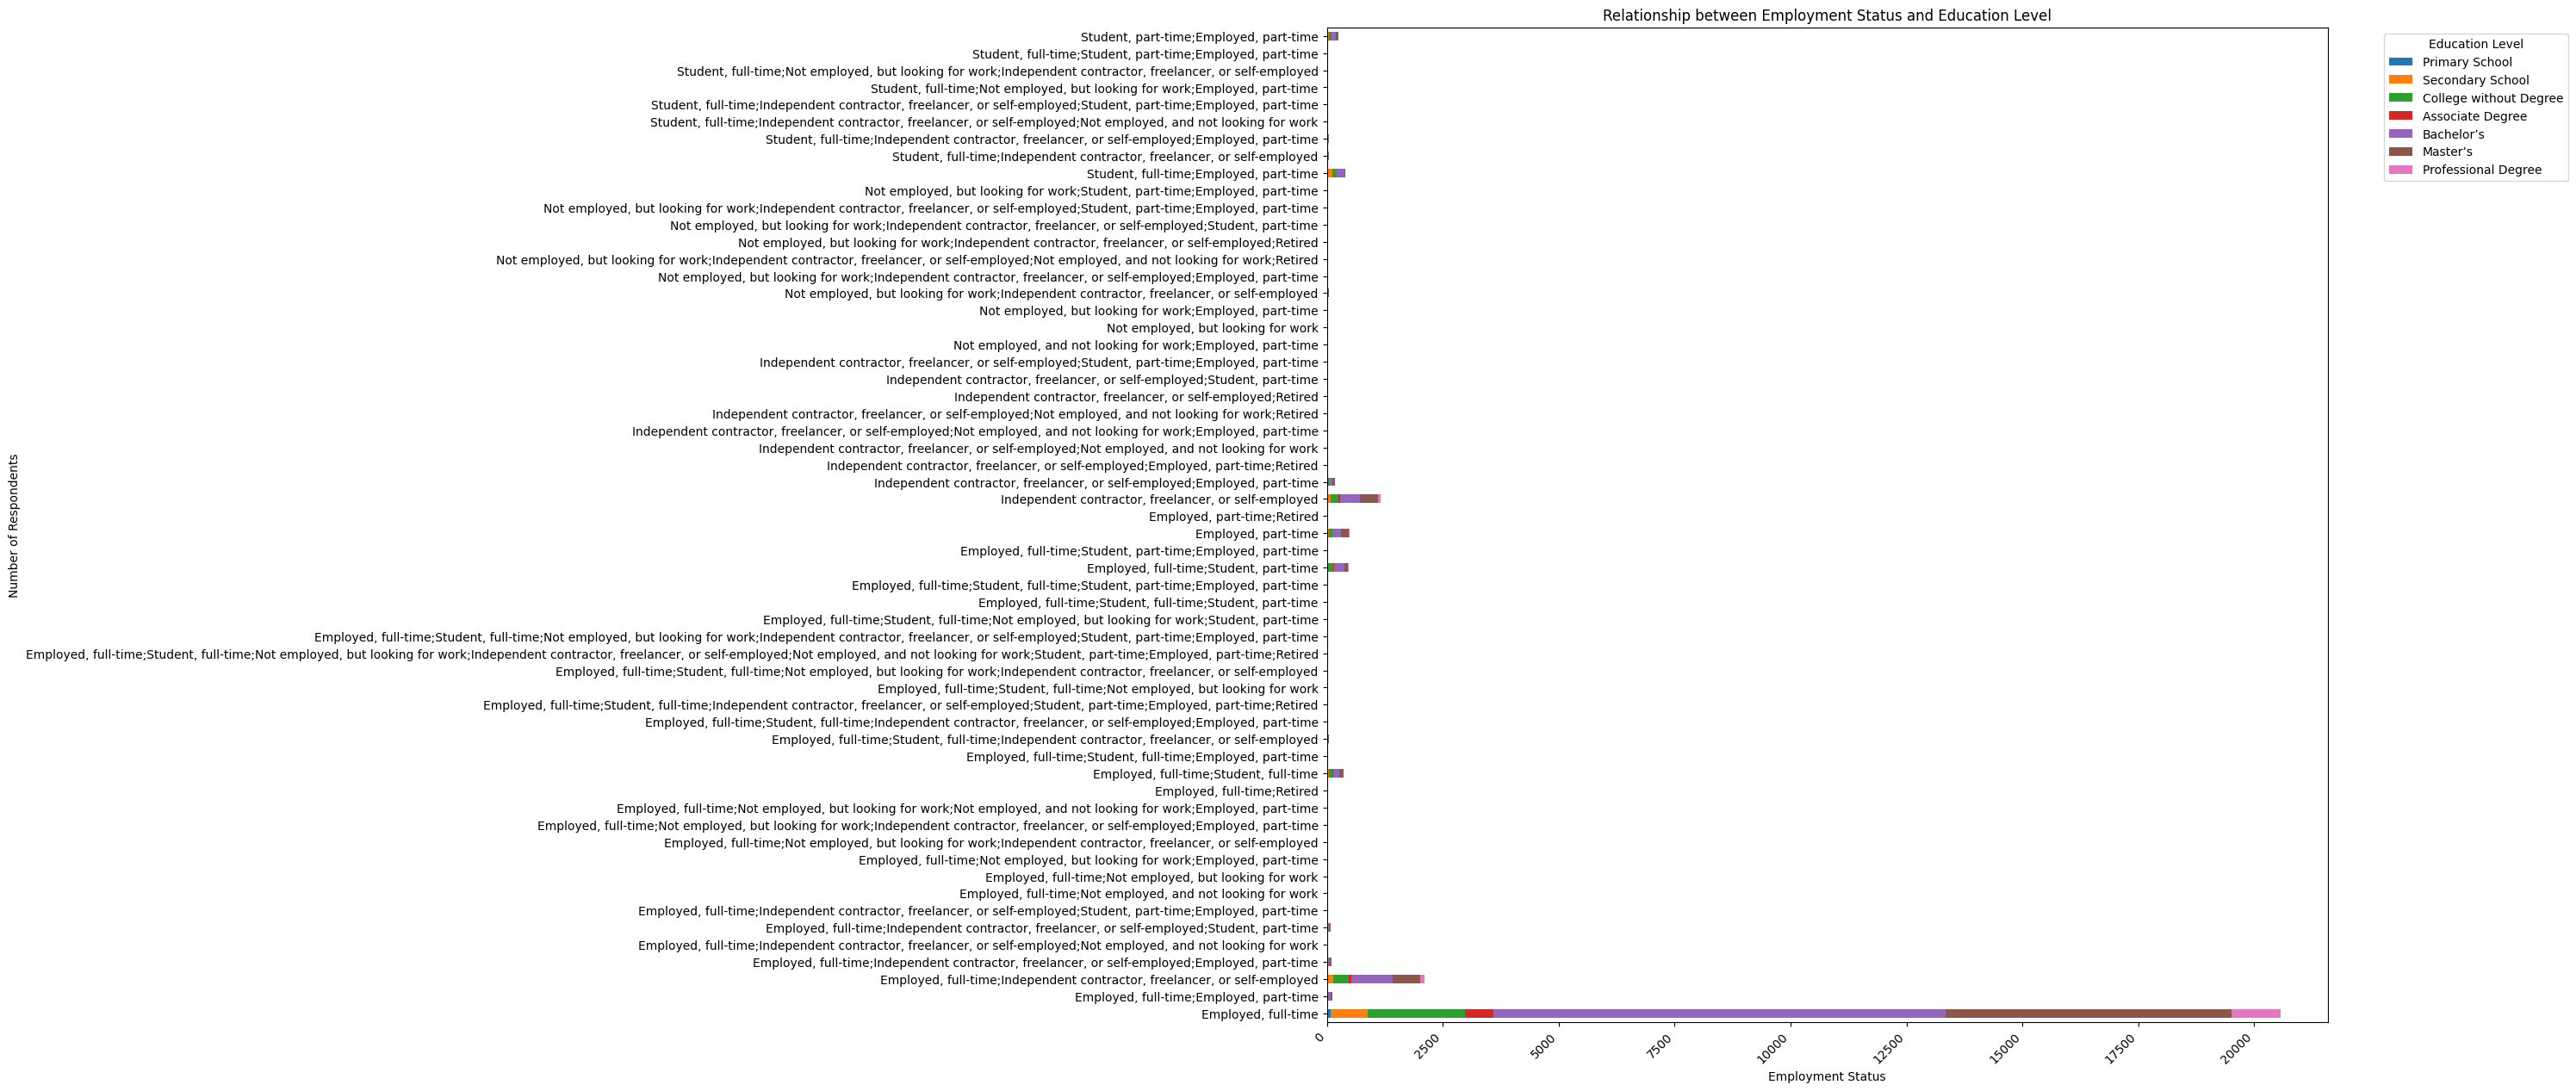


Cross-tabulation of Employment Status and Education Level:
| Employment                                                                                                                                                                                                           | Primary School   | Secondary School   | College without Degree   | Associate Degree   | Bachelor’s   | Master’s   | Professional Degree   |
|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------|:-------------------|:-------------------------|:-------------------|:-------------|:-----------|:----------------------|
| Employed, full-time                                                                                                                                                                                                  | 74       

In [81]:
## mapping the ed level as there are long range of label
column_to_check_edlevel = 'EdLevel'
df[column_to_check_edlevel] = df[column_to_check_edlevel].astype(str).str.strip()
edlevel_mapping = {
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s',
        'Some college/university study without earning a degree': 'College without Degree',
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary School',
        'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional Degree',
        'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
        'Primary/elementary school': 'Primary School',
        'Something else': 'Something Else',
        'nan': np.nan, # Ensure 'nan' string is also treated as NaN
        'NA' : np.nan
    }
#mapping for short labels to deal with label overlapping
df[column_to_check_edlevel] = df[column_to_check_edlevel].replace(edlevel_mapping)
crosstab_df = pd.crosstab(df['Employment'], df[column_to_check_edlevel], dropna=False)
ed_level_order = [
    'Primary School',
    'Secondary School',
    'College without Degree',
    'Associate Degree',
    'Bachelor’s',
    'Master’s',
    'Professional Degree',
    'Something else'
]

filtered_ed_level_order = [level for level in ed_level_order if level in crosstab_df.columns]
crosstab_df = crosstab_df[filtered_ed_level_order]


# Plotting the stacked bar chart
crosstab_df.plot(kind='barh', stacked=True, figsize=(15, 15))
plt.title('Relationship between Employment Status and Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the cross-tabulation table
print("\nCross-tabulation of Employment Status and Education Level:")
print(crosstab_df.to_markdown(numalign="left", stralign="left"))

#### Employed, full-time is the largest employment group and shows a wide range of education levels, with a significant concentration in Bachelor's and Master's degrees.
#### There are some complex employment statuses like "Employed, full-time;Student, part-time" and "Employed, full-time;Independent contractor, freelancer, or self-employed" which indicate individuals juggling multiple roles. Their education levels vary.

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [82]:
## Write your code here
df.to_csv('data_distribution_cleaned.csv', index=False)

### Summary:


In this lab, We practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


<i><b>This Lab is done by Bimal Upadhaya © 2025.<b><i>
